# SIMPSON 1/3

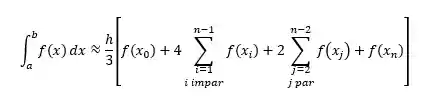

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import*

In [155]:
#Função
def f(x):
    return np.sqrt(4-(x-3)**2)

#Simpson's 1/3 
def simpson13(a,b,m):
    # calculating step size
    h = (b - a)/m
    
    integration = f(a) + f(b)
    
    for i in range(1, m):
        k = a + i*h
        if i%2 == 0:
            integration = integration + 2 * f(k)
        else:
            integration = integration + 4 * f(k)
    
    integration = integration * h/3
    
    return integration
    
    
a = 1
b = 3    
m = 10
resultado = simpson13(a, b, m)
print("Integração Simpson 1/3: %0.6f" % (resultado) )

Integração Simpson 1/3: 3.127008


# AJUSTE DE CURVAS

MINIMOS QUADRADOS LINEAR

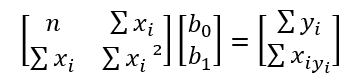

In [156]:
x = [0, 1, 1.2, 1.3, 1.5, 2, 2.2, 2.4, 2.6, 2.8, 3]
y = [1, 0, 1, 1, 0, 1, 0, 4, 6.2, 6, 7]

# x = [-1, 0, 1, 2, 3]
# y = [0, 1, 0, 1, 2]

n = len(x)
A = np.zeros((2, 2))
sum_xi = sum(x)
sum_xi2 =  sum(xi**2 for xi in x)
sum_yi = sum(y)
sum_xy =  sum(xi * yi for xi, yi in zip(x, y))

A[0][0] = n
A[0][1] = sum_xi
A[1][0] = sum_xi
A[1][1] = sum_xi2

b = [sum_yi, sum_xy]

X = list(np.linalg.solve(A,b))
print("A:")
display(Matrix(A));
print("b:")
display(Matrix(b))

print("Resultado:")
display(Matrix(X))


A:


Matrix([
[11.0,  20.0],
[20.0, 44.58]])

b:


Matrix([
[ 27.2],
[68.02]])

Resultado:


Matrix([
[-1.63558309360478],
[ 2.25957070148263]])

R²:

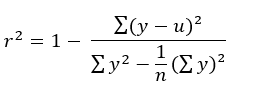

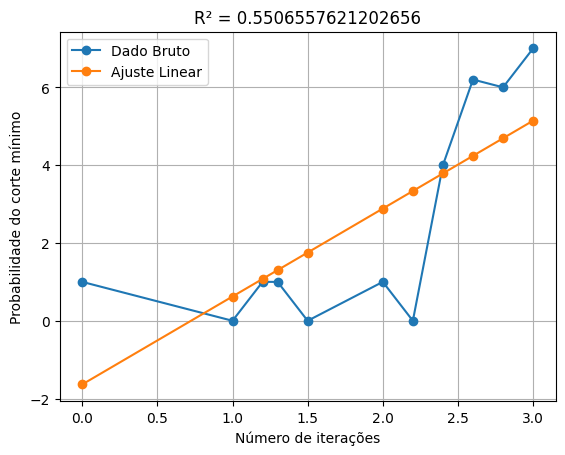

In [158]:
x = np.array(x)
X = list(np.linalg.solve(A,b))
beta = X[0]
alfa = X[1]
ypredlin = alfa*x+beta

#Calculando o erro
sum_yi2 =  sum(yi**2 for yi in y)
sum_y2 = sum_yi**2
sum_y_u =  sum((yi-ui)**2 for yi,ui in zip(y, ypredlin))

r2 = 1-(sum_y_u/(sum_yi2-((1/n)*sum_y2)))

plt.plot(x, y, marker='o',label='Dado Bruto')
plt.plot(x, ypredlin, marker='o',label='Ajuste Linear')
plt.xlabel('Número de iterações')
plt.ylabel('Probabilidade do corte mínimo')
plt.title(f'R² = {r2}')
plt.grid(True)
plt.legend()
plt.show()

MINIMOS QUADRADOS QUADRÁTICO

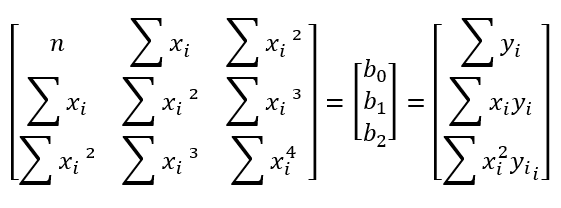

In [159]:
sum_xi3 =  sum(xi**3 for xi in x)
sum_xi4 =  sum(xi**4 for xi in x)
sum_x2y =  sum((xi**2) * yi for xi, yi in zip(x, y))

A = np.zeros((3, 3))

A[0][0] = n
A[0][1] = sum_xi
A[0][2] = sum_xi2
A[1][0] = sum_xi
A[1][1] = sum_xi2
A[1][2] = sum_xi3
A[2][0] = sum_xi2
A[2][1] = sum_xi3
A[2][2] = sum_xi4

b = [sum_yi, sum_xy, sum_x2y]

X = list(np.linalg.solve(A,b))
print("A:")
display(Matrix(A));
print("b:")
display(Matrix(b))

print("Resultado:")
display(Matrix(X))

A:


Matrix([
[ 11.0,  20.0,    44.58],
[ 20.0, 44.58,    107.3],
[44.58, 107.3, 271.7586]])

b:


Matrix([
[   27.2],
[  68.02],
[182.122]])

Resultado:


Matrix([
[ 1.40981791885056],
[-3.28315605730899],
[ 1.73519793716518]])

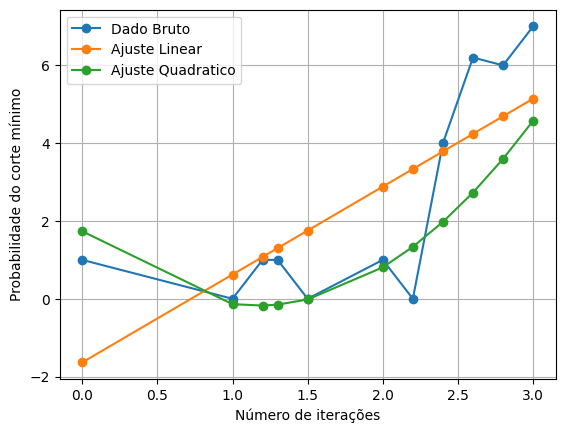

In [160]:
a = X[0]
b = X[1]
c = X[2]
ypredquad = a*x**2+b*x+c

plt.plot(x, y, marker='o',label='Dado Bruto')
plt.plot(x, ypredlin, marker='o',label='Ajuste Linear')
plt.plot(x, ypredquad, marker='o',label='Ajuste Quadratico')
plt.xlabel('Número de iterações')
plt.ylabel('Probabilidade do corte mínimo')
plt.grid(True)
plt.legend()
plt.show()